In [1]:
using HarmonicBalance
@variables α, ω, ω0, F, t, η, x(t) # declare constant variables and a function x(t)

diff_eq = DifferentialEquation(d(x,t,2) + ω0*x + α*x^3 + η*d(x,t)*x^2 ~ F*cos(ω*t), x)
add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

fixed = (α => 1., ω0 => 1.0, F => 0.01, η=>0.1)   # fixed parameters
swept = ω => LinRange(0.9, 1.2, 100)              # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:14
  # paths tracked:                  9
  # non-singular solutions (real):  3 (1)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (1)


A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


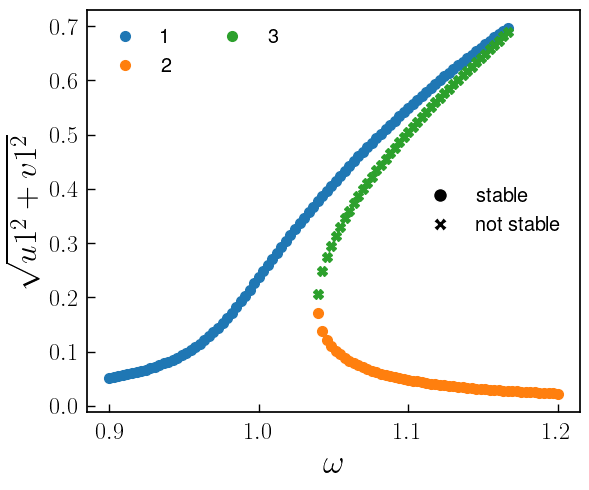

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/3fwVL/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [2]:
plot_1D_solutions(solutions, x="ω", y="sqrt(u1^2 + v1^2)");
HarmonicBalance.savefig("DuffingPlot.pdf")